### Importando o repositório

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('universityData.csv', on_bad_lines='warn', sep=";")
df.head(5)

,ENROLLMENT,TUITION PAYMENT MARCH 2022,TUITION PAYMENT MARCH 2023,GENDER,TYPE OF EDUCATIONAL INSTITUTION,EDUCATIONAL INSTITUTION,INSTITUTION STATUS,DEPARTMENT,PROVINCE,DISTRICT,...,CAMPUS,FACULTY,PROGRAM/MAJOR,SHIFT/SCHEDULE,BENEFIT DISCOUNTS,STUDY MODE,AGE RANGE OF ENROLLED STUDENT,DISABILITY,NUMBER OF ENROLLED COURSES,AT-RISK COURSE
0,Nuevo,0,0,M,INSTITUTO,IDAT,PRIVADA,LIMA,LIMA,BRENA,...,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE REDES Y COMUNICACIONES,MIXTO,SIN BENEFICIO,Presencial,5. >=30,No,0,0
1,Nuevo,1,0,M,COLEGIO,COLEGIO SISE,PRIVADA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,...,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE SISTEMAS,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,3,0
2,Nuevo,1,1,F,NaN,NaN,NaN,LIMA,LIMA,JESUS MARIA,...,UTP Lima Centro,Fac. Der. Cienc. Polit. Y RRII,DERECHO,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,1,0
3,Nuevo,0,0,F,COLEGIO,1220 SAN JOSE MARELLO,ESTATAL,LIMA,LIMA,ATE,...,UTP Lima Centro,Fac. Adm. Y Neg.,ADMINISTRACION DE NEGOCIOS (50/50),NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,0,0
4,Nuevo,1,1,F,INSTITUTO,IDAT,PRIVADA,LIMA,LIMA,SURQUILLO,...,UTP Lima Centro,Fac. Adm. Y Neg.,ADM. DE NEGOCIOS INTERNACIO,MAÑANA,CONVENIOS,Presencial,4. 24-29,No,2,0


In [3]:
print(df['GENDER'].dtype)
print(df['GENDER'].unique()) #Descobrimos aqui, que 1 e 2 são STRINGS e não integers
df['GENDER'] = df['GENDER'].replace({'1': 'M', '2': 'F'})
print(df['GENDER'].value_counts())

object
['M' 'F' 'U' '2' '1' nan]
GENDER
M    21128
F    16251
U      201
Name: count, dtype: int64


In [41]:
anoUm = df['TUITION PAYMENT MARCH 2022'].value_counts()
anoDois = df['TUITION PAYMENT MARCH 2023'].value_counts()
print(f"Em 2022, teve {anoUm[1]} inscrições. Em 2023 entretanto, ocorreu {anoDois[1]}. Uma diferença de {anoUm[1] - anoDois[1]} inscrições!")


Em 2022, teve 32376 inscrições. Em 2023 entretanto, ocorreu 31619. Uma diferença de 757 inscrições!


#### VERIFICANDO VALORES AUSENTES

In [5]:
for i in df.columns: #FILTRAGEM E SUBSTITUIÇÃO RESPECTIVAMENTE POR MODA E MEDIANA
    if df[i].dtype == object:
        df.loc[df[i].isna(), i] = df[i].mode()[0]
    else:
        df.loc[df[i].isna(), i] = df[i].median()
print(df.isna().sum())
print('Não há mais valores ausentes')

ENROLLMENT                         0
TUITION PAYMENT MARCH 2022         0
TUITION PAYMENT MARCH 2023         0
GENDER                             0
TYPE OF EDUCATIONAL INSTITUTION    0
EDUCATIONAL INSTITUTION            0
INSTITUTION STATUS                 0
DEPARTMENT                         0
PROVINCE                           0
DISTRICT                           0
CLASSIFICATION                     0
CAMPUS                             0
FACULTY                            0
PROGRAM/MAJOR                      0
SHIFT/SCHEDULE                     0
BENEFIT DISCOUNTS                  0
STUDY MODE                         0
AGE RANGE OF ENROLLED STUDENT      0
DISABILITY                         0
NUMBER OF ENROLLED COURSES         0
AT-RISK COURSE                     0
dtype: int64
Não há mais valores ausentes


In [21]:
inscritas2022 = df[(df['TUITION PAYMENT MARCH 2022'] == 1) & (df['GENDER'] == 'F')].shape[0]
inscritas2023 = df[(df['TUITION PAYMENT MARCH 2023'] == 1) & (df['GENDER'] == 'F')].shape[0]

variaçãoFeminina = inscritas2022 - inscritas2023
print(variaçãoFeminina)

inscritos2022 = df[(df['TUITION PAYMENT MARCH 2022'] == 1) & (df['GENDER'] == 'M')].shape[0]
inscritos2023 = df[(df['TUITION PAYMENT MARCH 2023'] == 1) & (df['GENDER'] == 'M')].shape[0]

variaçãoMasculina = inscritos2022 - inscritos2023
print(variaçãoMasculina)

genDesconhecido2022 = df[(df['TUITION PAYMENT MARCH 2022'] == 1) & (df['GENDER'] == 'U')].shape[0]
genDesconhecido2023 = df[(df['TUITION PAYMENT MARCH 2023'] == 1) & (df['GENDER'] == 'U')].shape[0]

variaçãoDesconhecidos = genDesconhecido2022 - genDesconhecido2023
print(variaçãoDesconhecidos)

254
498
5


32376
31619


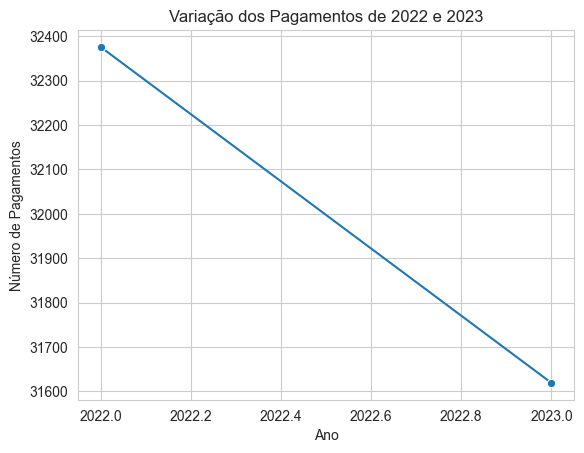

In [ ]:
pagamentos2022 = df['TUITION PAYMENT MARCH 2022'].eq(1).sum()
pagamentos2023 = df['TUITION PAYMENT MARCH 2023'].eq(1).sum()

data = [
    {'Ano': 2022, 'Pagamentos': pagamentos2022},
    {'Ano': 2023, 'Pagamentos': pagamentos2023}
]
df_variacao = pd.DataFrame(data)
sns.set_style("whitegrid")
sns.lineplot(x='Ano', y='Pagamentos', data=df_variacao, marker='o')
plt.title('Variação dos Pagamentos de 2022 e 2023')
plt.xlabel('Ano')
plt.ylabel('Número de Pagamentos')
plt.show()